Для проведения этого эксперимента, нужно сначала реализовать генерацию случайной квадратичной задачи с заданными значениями числа обусловленности и размерности пространства. Затем можно запустить градиентный спуск на этой задаче и измерить количество итераций, необходимых для сходимости. Повторив этот процесс для разных значений числа обусловленности и размерности, мы можем построить зависимость числа итераций от числа обусловленности для различных размерностей пространства.

C:\Temp\ipykernel_1796\1948728134.py:18: RuntimeWarning: invalid value encountered in scalar divide
  step_size = np.linalg.norm(gradient) ** 2 / np.linalg.norm(A.dot(gradient)) ** 2


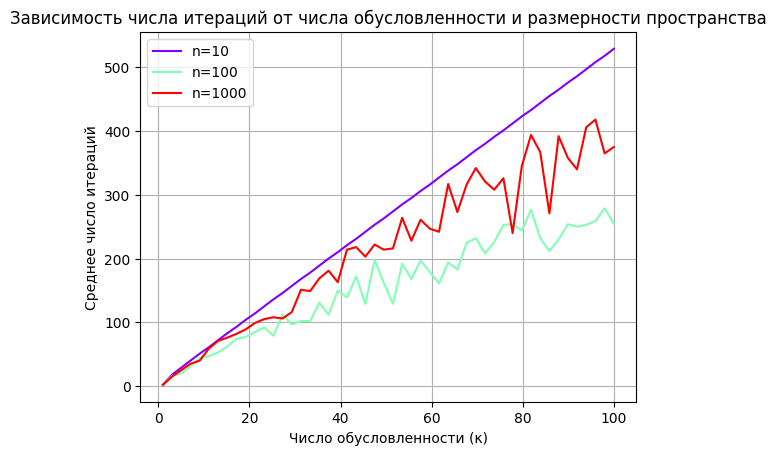

In [1]:
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt

# Реализация генерации случайной квадратичной задачи
def generate_quadratic_problem(n, condition_number):
    np.random.seed(0)
    diagonal = np.random.uniform(1, condition_number, n)
    A = diags(diagonal)
    b = np.random.rand(n)
    return A, b

# Реализация градиентного спуска
def gradient_descent(A, b, tolerance=1e-5, max_iter=10000):
    x = np.zeros_like(b)
    for iteration in range(max_iter):
        gradient = A.dot(x) - b
        step_size = np.linalg.norm(gradient) ** 2 / np.linalg.norm(A.dot(gradient)) ** 2
        x -= step_size * gradient
        if np.linalg.norm(gradient) < tolerance:
            return x, iteration + 1
    return x, max_iter

# Эксперимент: зависимость числа итераций от числа обусловленности и размерности
n_values = [10, 100, 1000]  # Размерности пространства
kappa_values = np.linspace(1, 100, 50)  # Значения числа обусловленности
num_experiments = 5  # Количество повторений эксперимента

colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(n_values))))

for n in n_values:
    color = next(colors)
    iterations_list = []
    for kappa in kappa_values:
        total_iterations = 0
        for _ in range(num_experiments):
            A, b = generate_quadratic_problem(n, kappa)
            _, iterations = gradient_descent(A, b)
            total_iterations += iterations
        average_iterations = total_iterations / num_experiments
        iterations_list.append(average_iterations)
    plt.plot(kappa_values, iterations_list, color=color, label=f'n={n}')

plt.xlabel('Число обусловленности (κ)')
plt.ylabel('Среднее число итераций')
plt.title('Зависимость числа итераций от числа обусловленности и размерности пространства')
plt.legend()
plt.grid(True)
plt.show()


В этом коде мы генерируем случайные квадратичные задачи для разных значений числа обусловленности и размерности пространства. Затем запускаем градиентный спуск на каждой задаче и измеряем среднее количество итераций для нескольких повторений эксперимента. Результаты отображаются на графике, где каждый цвет представляет разные значения размерности пространства n.